## Logistic Regression

### 와인데이터 이용 분류

>- 포르투칼 비뉴 베르드 지방에서 만들어진 와인을 측정해서 얻은 데이터
>- 데이터셋의 구성
>>- 1,599개의 레드와인 데이터, 4,898개의 화이트 와인 데이터( 총 6,497개 )
>>- 12개의 정보와 1개의 클래스로 구성

In [16]:
import warnings

warnings.filterwarnings("ignore")

In [1]:
import pandas as pd

In [2]:
col = ['주석산농도','아세트산농도','구연산농도','진류당분농도', '염화나트륨농도','유리 아화산농도',
        '총 아황산농도','밀도','pH','황산칼륨농도','알코올도수', '와인맛(5-9등급)','레드1/화이트0']

In [3]:
wine = pd.read_csv('wine.csv', names = col)
wine.head()

,주석산농도,아세트산농도,구연산농도,진류당분농도,염화나트륨농도,유리 아화산농도,총 아황산농도,밀도,pH,황산칼륨농도,알코올도수,와인맛(5-9등급),레드1/화이트0
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


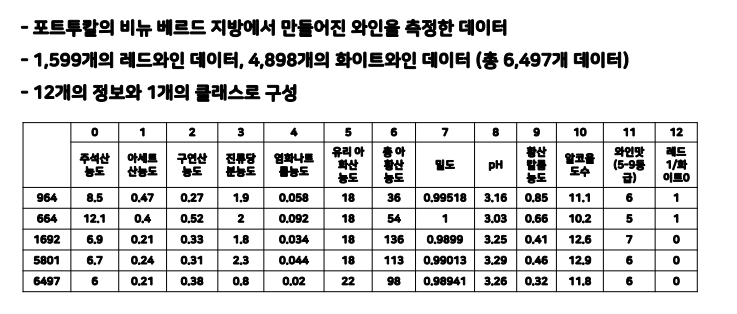

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = wine.iloc[:, 0:-1]
y = wine.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.3, random_state = 42)

In [6]:
from sklearn.linear_model import LogisticRegression

# C = 규제 강도  , max_iter = 최대 반복 횟수
model = LogisticRegression( C = 0.01 , max_iter= 15000)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=15000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
print("훈련 스코어 :", model.score(X_train, y_train))
print("테스트 스코어 :", model.score(X_test, y_test))

훈련 스코어 : 0.9502968990543216
테스트 스코어 : 0.9415384615384615


In [8]:
pred = model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 최적 C값 찾기

In [9]:
import matplotlib.pyplot as plt

In [10]:
train_accuracy = []
test_accuracy = [] 


c_list = ['0.001', '0.01', '0.1', '1.0', '10', '100', '1000']

for i in c_list :
    model = LogisticRegression( C = float(i), max_iter = 15000).fit(X_train, y_train) 
    train_accuracy.append(model.score(X_train,y_train))
    pre = model.predict(X_test)
    test_accuracy.append(model.score(X_test,y_test))

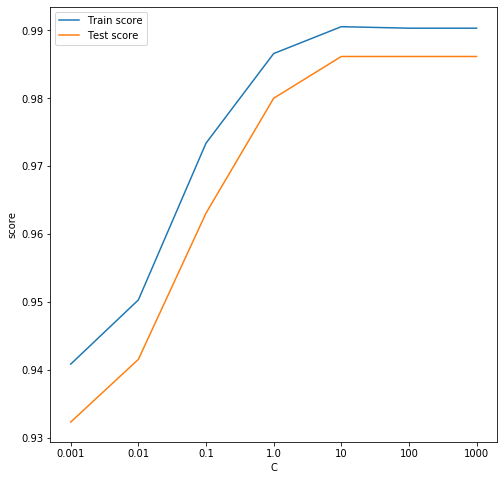

In [11]:
plt.figure( figsize = (8,8))
plt.plot(c_list, train_accuracy, label = 'Train score')
plt.plot(c_list, test_accuracy, label = 'Test score')
plt.legend()
plt.xlabel('C')
plt.ylabel('score')
plt.show()

## 교차검증

In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [14]:
# cross_val_score(학습 모델, 학습 데이터, 정답 데이터, 교차검증 분할)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print('교차검증 점수 : ' , scores)
print('교차검증 평균 점수 : ' , scores.mean())

교차검증 점수 :  [0.98571429 0.99120879 0.99229923 0.98789879 0.9889989 ]
교차검증 평균 점수 :  0.9892239993230092


## Logistic Regression

- c  값에 의해 규제를 수행 ! ( c 값이 작을 수록 강한 규제. c 값이 클수록 약한 규제 )
- L1 규제를 기본으로, L2 규제까지 같이 적용
- 매우 큰 데이터에서 잘 작동. 희소한 데이터 셋에서도 잘 작동함
- 작은 데이터셋에서는 성능이 좋지 않을수 있음

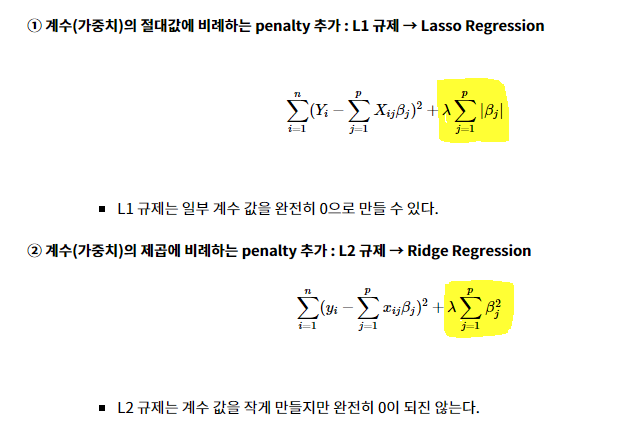

## LinearSVC

In [19]:
from sklearn.svm import LinearSVC

model = LinearSVC( C = 0.01) #선형SVM (soft vector machine)
model.fit(X_train, y_train)
print("훈련 스코어 : ", model.score(X_train, y_train))

훈련 스코어 :  0.9736089729491972


In [20]:
pred = model.predict(X_test)
print(pred)

[0 0 0 ... 0 0 0]


### Linear SVC와 Logistic Regression 장단점!

선형모델 주요 파라미터 
* 회귀모델은 alpha 
* LinearSVC, Logistic Regression에서는 C

>- alpha 값은 클수록 규제 커지고, C값은 클수록 규제 작아짐
>- 회귀모델에선 이 파라미터의 적절값을 찾는것이 매우 중요!
>- L1 규제를 사용할지(특성개수 줄임) L2 규제(튀는 데이터를 줄임)를 사용할지 결정

- 중요한 특성이 많지 않으면 ? L1규제 사용, 아니면 L2 규제 사용
- 선형 모델은 학습속도가 빠르고 예측이 빠름!

## GridSearchCV
- 그리드서치 기능과 교차검증 동시 수행

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = [{'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

model = LogisticRegression()

grid_search = GridSearchCV( model, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.best_params_
grid_search.best_estimator_

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

- GridSearchCV객체에 fit() 메서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동으로 만듦

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict(),score() 메스드를 제공함

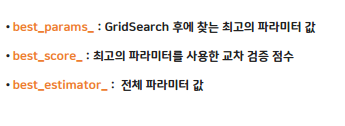

In [34]:
print("훈련 세트 스코어 : ", grid_search.score(X_train,y_train))
print("테스트 세트 스코어 : ", grid_search.score(X_test,y_test))
print("최적 매개변수 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : ", grid_search.best_score_)
print("최고 성능 모델의 파라미터 : ", grid_search.estimator)

훈련 세트 스코어 :  0.9910714285714286
테스트 세트 스코어 :  0.9736842105263158
최적 매개변수 :  {'C': 10}
최고 교차 검증 점수 :  0.9727272727272727
최고 성능 모델의 파라미터 :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### DecisionTree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
iris.data.shape

(150, 4)

In [39]:
param_grid = [
    {'max_depth' : range(1, 5), 
    'min_samples_leaf' : range(1, 50),
    'max_leaf_nodes' : range(1, 50, 10)}
]

model = DecisionTreeClassifier()
grid_search = GridSearchCV( model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': range(1, 5),
                          

In [40]:
print("훈련 세트 스코어 : ", grid_search.score(X_train,y_train))
print("테스트 세트 스코어 : ", grid_search.score(X_test,y_test))
print("최적 매개변수 : ", grid_search.best_params_)
print("최고 교차 검증 점수 : ", grid_search.best_score_)
print("최고 성능 모델의 파라미터 : ", grid_search.estimator)

훈련 세트 스코어 :  0.9821428571428571
테스트 세트 스코어 :  0.9473684210526315
최적 매개변수 :  {'max_depth': 4, 'max_leaf_nodes': 11, 'min_samples_leaf': 2}
최고 교차 검증 점수 :  0.9731225296442687
최고 성능 모델의 파라미터 :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
